In [16]:
d = {"a": 1, "b": 2, "c": 3}

# get first value
print(list(d.values())[0])

d.get(None, 0)

1


0

In [3]:
d = [0, 45, 90, 135, 180, 225, 270, 315]
# convert to rad
d = [i * 3.1415 / 180 for i in d]
# print 3 decimal places
print([round(i, 3) for i in d])


[0.0, 0.785, 1.571, 2.356, 3.142, 3.927, 4.712, 5.498]


In [ ]:
path = "https://pds.lroc.asu.edu/data/LRO-L-LROC-3-CDR-V1.0/LROLRC_1059B/DATA/ESM5/"

from ftplib import FTP

def list_directories(ftp, path):
    directories = []

    # Change to the target directory
    ftp.cwd(path)

    # List the contents of the directory
    def is_directory(line):
        parts = line.split(maxsplit=8)
        name = parts[-1]
        # Directory entries start with 'd'
        if line.startswith('d'):
            directories.append(name)

    # Use the `retrlines` method to list the directory contents
    ftp.retrlines('LIST', is_directory)
    
    return directories

# Connect to the FTP server
ftp = FTP('pds.lroc.asu.edu')
ftp.login()

# Specify the path where you want to list directories
path = '/path/to/directory'

directories = list_directories(ftp, path)
print("Directories:", directories)

# Close the FTP connection
ftp.quit()


In [2]:
import requests
from bs4 import BeautifulSoup

def list_files(url):
    # Send a GET request to the website
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful

    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all the <a> tags that represent files
    files = []
    for link in soup.find_all('a'):
        href = link.get('href')
        if href.endswith('.IMG') or href.endswith('.xml'):  # Check file extensions
            files.append(href)

    return files

# URL of the directory listing
url = 'https://pds.lroc.asu.edu/data/LRO-L-LROC-3-CDR-V1.0/LROLRC_1059B/DATA/ESM5/2024126/NAC/'

files = list_files(url)
for file in files:
    print(file)


M1469506660LC.IMG
M1469506660LC.xml
M1469506660RC.IMG
M1469506660RC.xml
M1469506814LC.IMG
M1469506814LC.xml
M1469506814RC.IMG
M1469506814RC.xml
M1469506990LC.IMG
M1469506990LC.xml
M1469506990RC.IMG
M1469506990RC.xml
M1469507243LC.IMG
M1469507243LC.xml
M1469507243RC.IMG
M1469507243RC.xml
M1469507422LC.IMG
M1469507422LC.xml
M1469507422RC.IMG
M1469507422RC.xml
M1469507593LC.IMG
M1469507593LC.xml
M1469507593RC.IMG
M1469507593RC.xml
M1469507766LC.IMG
M1469507766LC.xml
M1469507766RC.IMG
M1469507766RC.xml
M1469507971LC.IMG
M1469507971LC.xml
M1469507971RC.IMG
M1469507971RC.xml
M1469508168LC.IMG
M1469508168LC.xml
M1469508168RC.IMG
M1469508168RC.xml
M1469508331LC.IMG
M1469508331LC.xml
M1469508331RC.IMG
M1469508331RC.xml
M1469508567LC.IMG
M1469508567LC.xml
M1469508567RC.IMG
M1469508567RC.xml
M1469508863LC.IMG
M1469508863LC.xml
M1469508863RC.IMG
M1469508863RC.xml
M1469509068LC.IMG
M1469509068LC.xml
M1469509068RC.IMG
M1469509068RC.xml
M1469509285LC.IMG
M1469509285LC.xml
M1469509285RC.IMG
M146950928

In [3]:
import requests
from bs4 import BeautifulSoup

def list_files_with_sizes(url):
    # Send a GET request to the website
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful

    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')

    files_with_sizes = []
    total_size = 0

    # Find all rows in the directory listing table
    rows = soup.find_all('tr')
    
    for row in rows:
        columns = row.find_all('td')
        if len(columns) > 2:  # Ensure the row has enough columns
            file_name = columns[0].find('a').get('href')
            file_size = columns[2].text.strip()
            
            if file_size.endswith('K'):
                size_in_bytes = float(file_size[:-1]) * 1024
            elif file_size.endswith('M'):
                size_in_bytes = float(file_size[:-1]) * 1024 * 1024
            elif file_size.endswith('G'):
                size_in_bytes = float(file_size[:-1]) * 1024 * 1024 * 1024
            else:
                size_in_bytes = float(file_size)

            files_with_sizes.append((file_name, file_size, size_in_bytes))
            total_size += size_in_bytes

    return files_with_sizes, total_size

# URL of the directory listing
url = 'https://pds.lroc.asu.edu/data/LRO-L-LROC-3-CDR-V1.0/LROLRC_1059B/DATA/ESM5/2024126/NAC/'

files_with_sizes, total_size = list_files_with_sizes(url)

# Print the file names with their sizes
for file_name, file_size, _ in files_with_sizes:
    print(f"{file_name}: {file_size}")

# Print the total size in a readable format
print(f"\nTotal size: {total_size / (1024 * 1024):.2f} MB")


AttributeError: 'NoneType' object has no attribute 'get'

In [1]:
import requests

def get_file_sizes(url):
    response = requests.get(url)
    response.raise_for_status()
    
    total_size = 0
    for file_url in response.json():  # Assuming the directory listing returns a JSON with file URLs
        file_response = requests.head(file_url)
        total_size += int(file_response.headers.get('content-length', 0))
    
    return total_size

directory_url = "https://pds.lroc.asu.edu/data/LRO-L-LROC-3-CDR-V1.0/LROLRC_1059B/DATA/"
total_size_in_bytes = get_file_sizes(directory_url)
print(f"Total size: {total_size_in_bytes / (1024 * 1024):.2f} MB")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [5]:
import requests

# URL of the JSON endpoint (hypothetical example)
url = 'https://pds.lroc.asu.edu/data/LRO-L-LROC-3-CDR-V1.0/LROLRC_1059B/DATA/ESM5/2024126/NAC/'

response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful

# Parse the JSON data
data = response.json()

# Print the data to inspect the structure
print(data)


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [2]:
import os
from pathlib import Path
from data_tools.cut_tiff import cut_raster_into_pieces

data_dir = Path("/home/dpastorm/Projects/lunamaps/moon_data/new_pgda78")
raw_tiffs_dir = data_dir / "raw_tifs"

sizes_target = [1, 2, 5]

def size_km_to_str(size_km):
    if size_km < 1:
        return f"{size_km * 1000:.0f}m"
    return f"{size_km}km"

for size in sizes_target:
    size_str = size_km_to_str(size)
    print(size_str)

for tiff_file in os.listdir(raw_tiffs_dir):
    print(tiff_file)

for tiff_file in os.listdir(raw_tiffs_dir):
    os.makedirs(data_dir / Path(tiff_file).stem , exist_ok=True)
    for size in sizes_target:
        os.makedirs( data_dir / Path(tiff_file).stem / f"pieces_{size_km_to_str(size)}", exist_ok=True)
        cut_raster_into_pieces(raw_tiffs_dir / Path(tiff_file), data_dir / Path(tiff_file).stem / f"pieces_{size_km_to_str(size)}", size)


1km
2km
5km
LM1_final_adj_5mpp_surf.tif
Site11_final_adj_5mpp_surf.tif
Site06_final_adj_5mpp_surf.tif
NPD_final_adj_5mpp_surf.tif
Shoemaker_final_adj_5mpp_surf.tif
Site23_final_adj_5mpp_surf.tif
Haworth_final_adj_5mpp_surf.tif
NPA_final_adj_5mpp_surf.tif
NPB_final_adj_5mpp_surf.tif
Site20v2_final_adj_5mpp_surf.tif
LM5_final_adj_5mpp_surf.tif
Site04_final_adj_5mpp_surf.tif
Site20_final_adj_5mpp_surf.tif
LM8_final_adj_5mpp_surf.tif
Site07_final_adj_5mpp_surf.tif
SL3_final_adj_5mpp_surf.tif
SL2_final_adj_5mpp_surf.tif
Site01_final_adj_5mpp_surf.tif
LM3_final_adj_5mpp_surf.tif
NPC_final_adj_5mpp_surf.tif
LM2_final_adj_5mpp_surf.tif
Site42_final_adj_5mpp_surf.tif
LM4_final_adj_5mpp_surf.tif
LM6_final_adj_5mpp_surf.tif
LM7_final_adj_5mpp_surf.tif
DM2_final_adj_5mpp_surf.tif
DM1_final_adj_5mpp_surf.tif
Cutting the raster into 1 km x 1 km pieces
Cutting the raster into 20 x 20 pieces
Cutting the raster into 2 km x 2 km pieces
Cutting the raster into 10 x 10 pieces
Cutting the raster into 5 km 

In [4]:
target_tiffs = ["Haworth_final_adj_5mpp_surf.tif"]
sizes_target = [0.5]
for tiff_file in target_tiffs:
    os.makedirs(data_dir / Path(tiff_file).stem , exist_ok=True)
    for size in sizes_target:
        os.makedirs( data_dir / Path(tiff_file).stem / f"pieces_{size_km_to_str(size)}", exist_ok=True)
        cut_raster_into_pieces(raw_tiffs_dir / Path(tiff_file), data_dir / Path(tiff_file).stem / f"pieces_{size_km_to_str(size)}", size)

Cutting the raster into 0.5 km x 0.5 km pieces
Cutting the raster into 59 x 59 pieces


In [1]:
import configuration_manager

# test cases_grid_indices

grid_sizes = {"p1": 3,
              "p2": 2,
              "p3": 7,}

total_grid_cases = configuration_manager.get_total_grid_cases(grid_sizes)
print(f"Total grid cases: {total_grid_cases}")
for i in range(total_grid_cases):
    grid_indices = configuration_manager.cases_grid_indices(grid_sizes, i)
    print(f" - {i:2d}: {list(grid_indices.values())}")

Total grid cases: 42
 -  0: [0, 0, 0]
 -  1: [1, 0, 0]
 -  2: [2, 0, 0]
 -  3: [3, 1, 0]
 -  4: [4, 1, 0]
 -  5: [5, 1, 0]
 -  6: [6, 2, 1]
 -  7: [7, 2, 1]
 -  8: [8, 2, 1]
 -  9: [9, 3, 1]
 - 10: [10, 3, 1]
 - 11: [11, 3, 1]
 - 12: [12, 4, 2]
 - 13: [13, 4, 2]
 - 14: [14, 4, 2]
 - 15: [15, 5, 2]
 - 16: [16, 5, 2]
 - 17: [17, 5, 2]
 - 18: [18, 6, 3]
 - 19: [19, 6, 3]
 - 20: [20, 6, 3]
 - 21: [21, 7, 3]
 - 22: [22, 7, 3]
 - 23: [23, 7, 3]
 - 24: [24, 8, 4]
 - 25: [25, 8, 4]
 - 26: [26, 8, 4]
 - 27: [27, 9, 4]
 - 28: [28, 9, 4]
 - 29: [29, 9, 4]
 - 30: [30, 10, 5]
 - 31: [31, 10, 5]
 - 32: [32, 10, 5]
 - 33: [33, 11, 5]
 - 34: [34, 11, 5]
 - 35: [35, 11, 5]
 - 36: [36, 12, 6]
 - 37: [37, 12, 6]
 - 38: [38, 12, 6]
 - 39: [39, 13, 6]
 - 40: [40, 13, 6]
 - 41: [41, 13, 6]


In [10]:
import re
files = ["file1", "file2", "file3", "depth__00001", "depth__00000", "seg__00000", "seg_00003", "seg__0004"]
files_to_correct = ["depth", "seg"]
pattern = "__\d{5}$"

render_files = []
for file in files:
    # print(f"Checking {file}")
    for file_to_correct in files_to_correct:
        # print(f"Checking {file_to_correct} pattern {f'{file_to_correct}{pattern}'}")
        # find pattern in the file name
        if re.search(f"{file_to_correct}{pattern}", file):
            new_file = re.sub(pattern, '', file)
            print(f"Renaming {file} to {new_file}")

            render_files.append(new_file)

print(render_files)

rr = ["aa"]

print(rr + render_files)

Renaming depth__00001 to depth
Renaming depth__00000 to depth
Renaming seg__00000 to seg
['depth', 'depth', 'seg']
['aa', 'depth', 'depth', 'seg']


In [1]:
import bpy

# create rock
bpy.ops.mesh.primitive_cube_add(size=2)
rock = bpy.context.object
rock.name = "rock"
rock.location = (0, 0, 0)
    

In [9]:
import bpy
import addon_utils

installed_addons = bpy.context.preferences.addons.keys()

addon_utils.enable("io_scene_gltf")
# List all possible addons
all_addons = bpy.ops.preferences.addon_expanded(
    dict()
)
print("All Possible Addons:")
for addon in all_addons['module']:
    print(addon)

Add-on not loaded: "io_scene_gltf", cause: No module named 'io_scene_gltf'


ValueError: 1-2 args execution context is supported

In [8]:
import humanize
import datetime as dt
print(humanize.naturalsize(1000000))
def dth(d, minimum_unit="microseconds"):
    return humanize.precisedelta(dt.timedelta(seconds=d), minimum_unit=minimum_unit)
print(dth(1000000))
print(dth(10000000))
print(dth(.00001))


1.0 MB
11 days, 13 hours, 46 minutes and 40 seconds
3 months, 23 days, 17 hours, 46 minutes and 40 seconds
10 microseconds


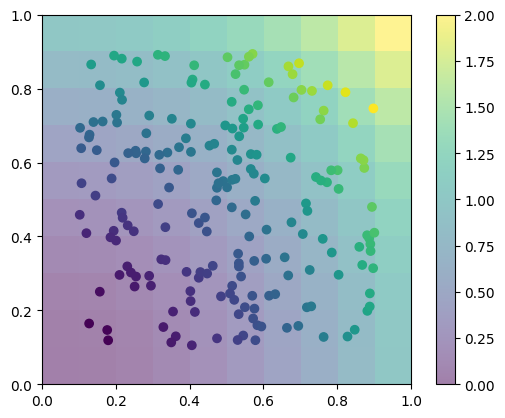

In [33]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator # interp2d is deprecated
import timeit

x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)

X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

interpolant = RegularGridInterpolator((x, y), Z)

new_x = np.random.uniform(0.1, 0.9, 200)
new_y = np.random.uniform(0.1, 0.9, 200)

new_z = interpolant((new_x, new_y))

# plot it
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(new_x, new_y, c=new_z)
fig.colorbar(ax.imshow(Z, extent=(0, 1, 0, 1), origin='lower', alpha=0.5))
ax.set_aspect('equal')

In [8]:
import bpy

#  create a donut
bpy.ops.mesh.primitive_torus_add()
donut = bpy.context.object

# create a rock generation
bpy.ops.mesh.add_mesh_rock()

bpy.ops.mesh.add_mesh_rock(preset_values='2', scale_X=(1, 1), skew_X=0, scale_Y=(1, 1), skew_Y=0, scale_Z=(1, 1), skew_Z=0, use_scale_dis=False, scale_fac=(1, 1, 1), deform=7.5, rough=3, detail=4, display_detail=2, smooth_fac=0, smooth_it=0, use_generate=True, use_random_seed=True, user_seed=1)


AttributeError: Calling operator "bpy.ops.mesh.add_mesh_rock" error, could not be found

Generated 475 rocks with CFA=2.80% in 5 iterations
Generated 536 rocks with CFA=2.81% in 6 iterations
Generated 443 rocks with CFA=2.78% in 5 iterations
Generated 486 rocks with CFA=2.77% in 5 iterations
Generated 516 rocks with CFA=2.80% in 6 iterations
Generated 538 rocks with CFA=2.80% in 6 iterations
Generated 512 rocks with CFA=2.80% in 6 iterations
Generated 460 rocks with CFA=2.80% in 5 iterations
Generated 512 rocks with CFA=2.80% in 6 iterations
Generated 548 rocks with CFA=2.80% in 6 iterations
Generated 513 rocks with CFA=2.80% in 6 iterations
Generated 495 rocks with CFA=2.80% in 5 iterations
Generated 474 rocks with CFA=2.81% in 5 iterations
Generated 536 rocks with CFA=2.80% in 6 iterations
Generated 442 rocks with CFA=2.80% in 5 iterations
Generated 505 rocks with CFA=2.79% in 6 iterations
Generated 519 rocks with CFA=2.79% in 6 iterations
Generated 487 rocks with CFA=2.79% in 5 iterations
Generated 486 rocks with CFA=2.76% in 5 iterations
Generated 552 rocks with CFA=2.

(array([   8.,   12.,   41.,   99.,  211.,  323.,  649.,  924., 1069.,
        1386., 1454., 1167., 1088.,  717.,  398.,  262.,  122.,   44.,
          19.,    7.]),
 array([371.  , 383.65, 396.3 , 408.95, 421.6 , 434.25, 446.9 , 459.55,
        472.2 , 484.85, 497.5 , 510.15, 522.8 , 535.45, 548.1 , 560.75,
        573.4 , 586.05, 598.7 , 611.35, 624.  ]),
 <BarContainer object of 20 artists>)

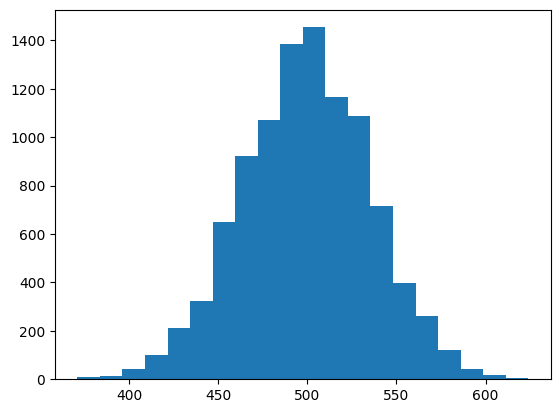

In [5]:
# create field rocks, gather statistics on number of rocks

import matplotlib.pyplot as plt

import lunasynth.terrain_enhancement as te

import numpy as np
# create a field of rocks

CFA = 0.04
size_x = 100
size_y = 100
h_min = 0.4
h_max = 4.0

n_gen = 10000
N_rocks = []
for i in range(n_gen):
    rock_field = te.RockField()
    rock_field.generate_rock_field(
        CFA, size_x, size_y, h_min, h_max
    )
    N_rocks.append(len(rock_field.rocks))

N_rocks = np.array(N_rocks)
print(f"Average number of rocks: {sum(N_rocks)/n_gen}, standard deviation: {np.std(N_rocks)}")

fig, ax = plt.subplots()
ax.hist(N_rocks, bins = 20)

Text(0, 0.5, 'Number PDF')

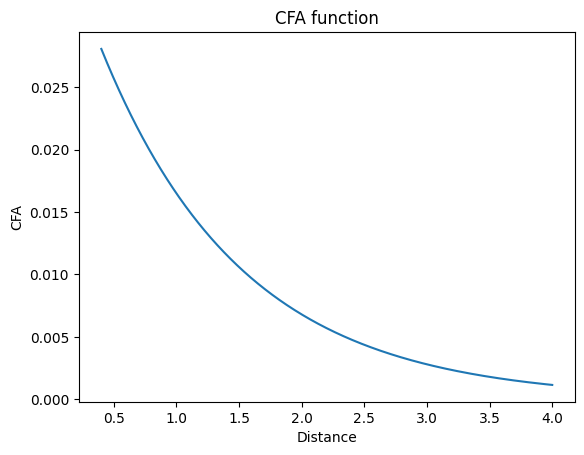

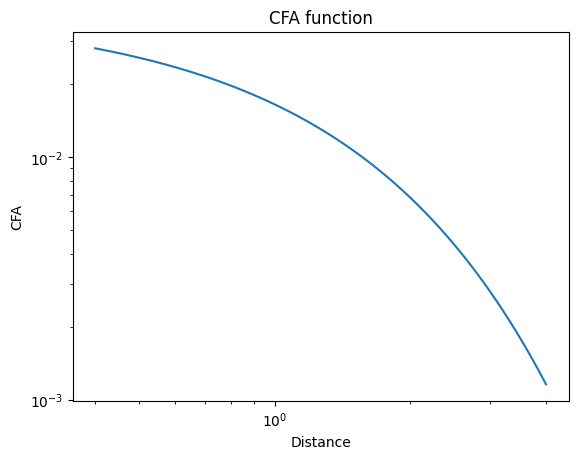

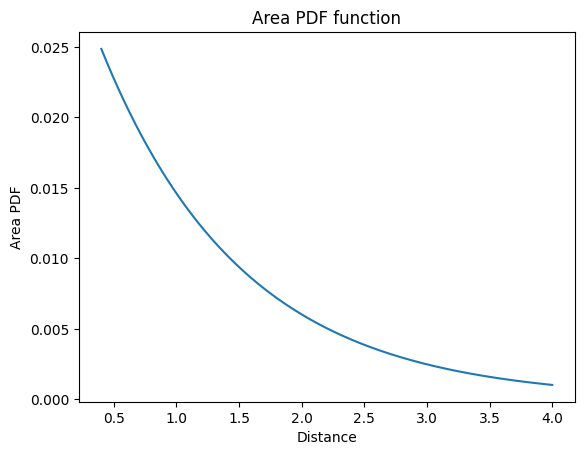

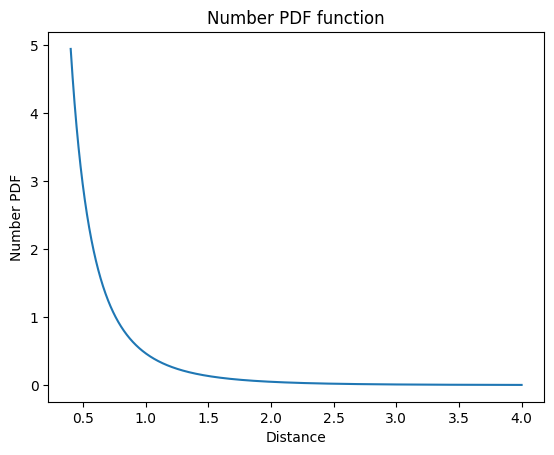

In [8]:
import numpy as np
import matplotlib.pyplot as plt

import lunasynth.terrain_enhancement as te
k = 0.04
h_min = 0.4
h_max = 4.0
rf = te.RockField()
q = rf.q(k)
cfa_f = lambda d : k * np.exp(-q * d)

n_points = 1000
D = np.logspace(np.log10(h_min), np.log10(h_max), n_points)

cfa = cfa_f(D)

fig, ax = plt.subplots()
ax.plot(D, cfa)
ax.set_title("CFA function")
ax.set_xlabel("Distance")
ax.set_ylabel("CFA")

fig, ax = plt.subplots()
ax.plot(D, cfa)
ax.set_title("CFA function")
ax.set_xlabel("Distance")
ax.set_ylabel("CFA")
ax.set_xscale("log")
ax.set_yscale("log")


area_pdf_f = lambda d : q * k * np.exp(-q * d)
area_pdf = area_pdf_f(D)

number_pdf_f = lambda d : 4* q * np.exp(-q * d) / ( np.pi * d * d)

number_cdf_f = lambda d : 1 - np.exp(-q / d)
 
fig, ax = plt.subplots()
ax.plot(D, area_pdf)
ax.set_title("Area PDF function")
ax.set_xlabel("Distance")
ax.set_ylabel("Area PDF")


fig, ax = plt.subplots()
ax.plot(D, number_pdf_f(D))
ax.set_title("Number PDF function")
ax.set_xlabel("Distance")
ax.set_ylabel("Number PDF")




In [10]:
import matplotlib.pyplot as plt
from osgeo import gdal
import os
import numpy as np
import humanize

# Open the TIFF file
tiff_file = "/home/dpastorm/Projects/lunamaps/moon_data/pgda/LOLA_5mpp/DM1/DM1_final_adj_5mpp_surf.tif"
dataset = gdal.Open(tiff_file)

# Read the raster bands as arrays
band = dataset.GetRasterBand(1)
array = band.ReadAsArray()

# Get image size (dimensions)
width = dataset.RasterXSize
height = dataset.RasterYSize

print(f'Image dimensions: {width} x {height}')

# Get the image size in bytes
file_size = os.path.getsize(tiff_file)
print(f'Image size: {humanize.naturalsize(file_size)}')

# Display the image
plt.imshow(array, cmap='gray')
plt.title('TIFF Image')
plt.axis('off')
plt.show()

# show the image in 3d  
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, width, width)
y = np.linspace(0, height, height)
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, array, cmap='gray')
# ensure the aspect ratio is correct
ax.set_box_aspect([1,1,1.0])
plt.title('TIFF Image 3D')
plt.show()


ModuleNotFoundError: No module named 'osgeo'

In [6]:
import bpy

# Define the path to the source Blender file and the name of the material
source_file_path = '/home/dpastorm/textures/rocky_trail_02/rocky_trail_02_8k.blend'
material_name = 'rocky_trail_02'

# Append the material from the source file
# with bpy.data.libraries.load(source_file_path, link=False) as (data_from, data_to):
#     print(f"Materials in source file: {data_from.materials}")
#     if len(data_from.materials) == 1:
#         material_name = data_from.materials[0]
#         data_to.materials.append(material_name)

import lunasynth.blender_helper as blender_helper

blender_helper.add_material(source_file_path, material_name)

# Assign the material to an object (example: the active object)
obj = bpy.context.active_object

# Check if the material was successfully appended
if material_name in bpy.data.materials:
    material = bpy.data.materials[material_name]
    # Assign the material to the first material slot of the object
    if obj.data.materials:
        obj.data.materials[0] = material
    else:
        obj.data.materials.append(material)
else:
    print(f"Material '{material_name}' not found in the source file.")

# save blender file
bpy.ops.wm.save_as_mainfile(filepath=source_file_path.replace('.blend', '_with_material_2.blend'))


NameError: name 'blender_helper' is not defined

In [7]:
import numpy as np
from scipy.ndimage import zoom

# Original array
original_array = np.array([
    [1.0, 2.0],
    [3.0, 4.0]
])

# Interpolating the array to double the number of rows and columns
zoom_factor = 10
interpolated_array = zoom(original_array, zoom_factor, order=4)

print(f"Shape of original array: {original_array.shape}, shape of interpolated array: {interpolated_array.shape}")
print(interpolated_array)


Shape of original array: (2, 2), shape of interpolated array: (20, 20)
[[1.         1.00663592 1.02639636 1.05883933 1.10322818 1.15853163
  1.2234237  1.29628379 1.37519663 1.45795229 1.54204771 1.62480337
  1.70371621 1.7765763  1.84146837 1.89677182 1.94116067 1.97360364
  1.99336408 2.        ]
 [1.01327184 1.01990777 1.0396682  1.07211117 1.11650003 1.17180347
  1.23669554 1.30955564 1.38846847 1.47122413 1.55531956 1.63807521
  1.71698805 1.78984814 1.85474022 1.91004366 1.95443252 1.98687548
  2.00663592 2.01327184]
 [1.05279272 1.05942864 1.07918908 1.11163205 1.1560209  1.21132435
  1.27621642 1.34907651 1.42798935 1.51074501 1.59484043 1.67759609
  1.75650893 1.82936902 1.89426109 1.94956454 1.99395339 2.02639636
  2.0461568  2.05279272]
 [1.11767866 1.12431458 1.14407501 1.17651798 1.22090684 1.27621028
  1.34110235 1.41396245 1.49287528 1.57563094 1.65972637 1.74248203
  1.82139486 1.89425496 1.95914703 2.01445047 2.05883933 2.0912823
  2.11104273 2.11767866]
 [1.20645637 1

In [1]:
import rasterio
import numpy as np
from scipy.ndimage import zoom

# Read the original GeoTIFF
original_image = '/home/dpastorm/Projects/lunamaps/moon_data/pgda/DM1_final_adj_5mpp_surf.tif'
with rasterio.open(original_image) as src:
    original_array = src.read(1)  # Read the first band
    original_transform = src.transform
    original_crs = src.crs
    original_meta = src.meta

# Interpolate the array to double the number of rows and columns
zoom_factor = 4
interpolated_array = zoom(original_array, zoom_factor, order=3)

# Update the metadata for the new image
new_meta = original_meta.copy()
new_meta.update({
    'height': interpolated_array.shape[0],
    'width': interpolated_array.shape[1],
    'transform': rasterio.Affine(original_transform.a / zoom_factor, original_transform.b, original_transform.c,
                                 original_transform.d, original_transform.e / zoom_factor, original_transform.f)
})

# Save the interpolated array as a new GeoTIFF
with rasterio.open('interpolated_image.tif', 'w', **new_meta) as dst:
    dst.write(interpolated_array, 1)  # Write to the first band

print("Interpolated GeoTIFF saved with updated metadata.")


Interpolated GeoTIFF saved with updated metadata.


In [47]:
params = [0.1, 0.2, 0.3, 0.4, 0.5]

def func(a, b, c, d, e):
    return a + b + c + d + e

def get_func_values(func, *params):
    print(f"params {params}")
    return func(*params)
result = get_func_values(func, 0.1, 0.2, 0.3, 0.6, 0.5)
result = get_func_values(func, *params)
print(result)

params (0.1, 0.2, 0.3, 0.6, 0.5)
params (0.1, 0.2, 0.3, 0.4, 0.5)
1.5


Text(0.5, 0, 'Depth')

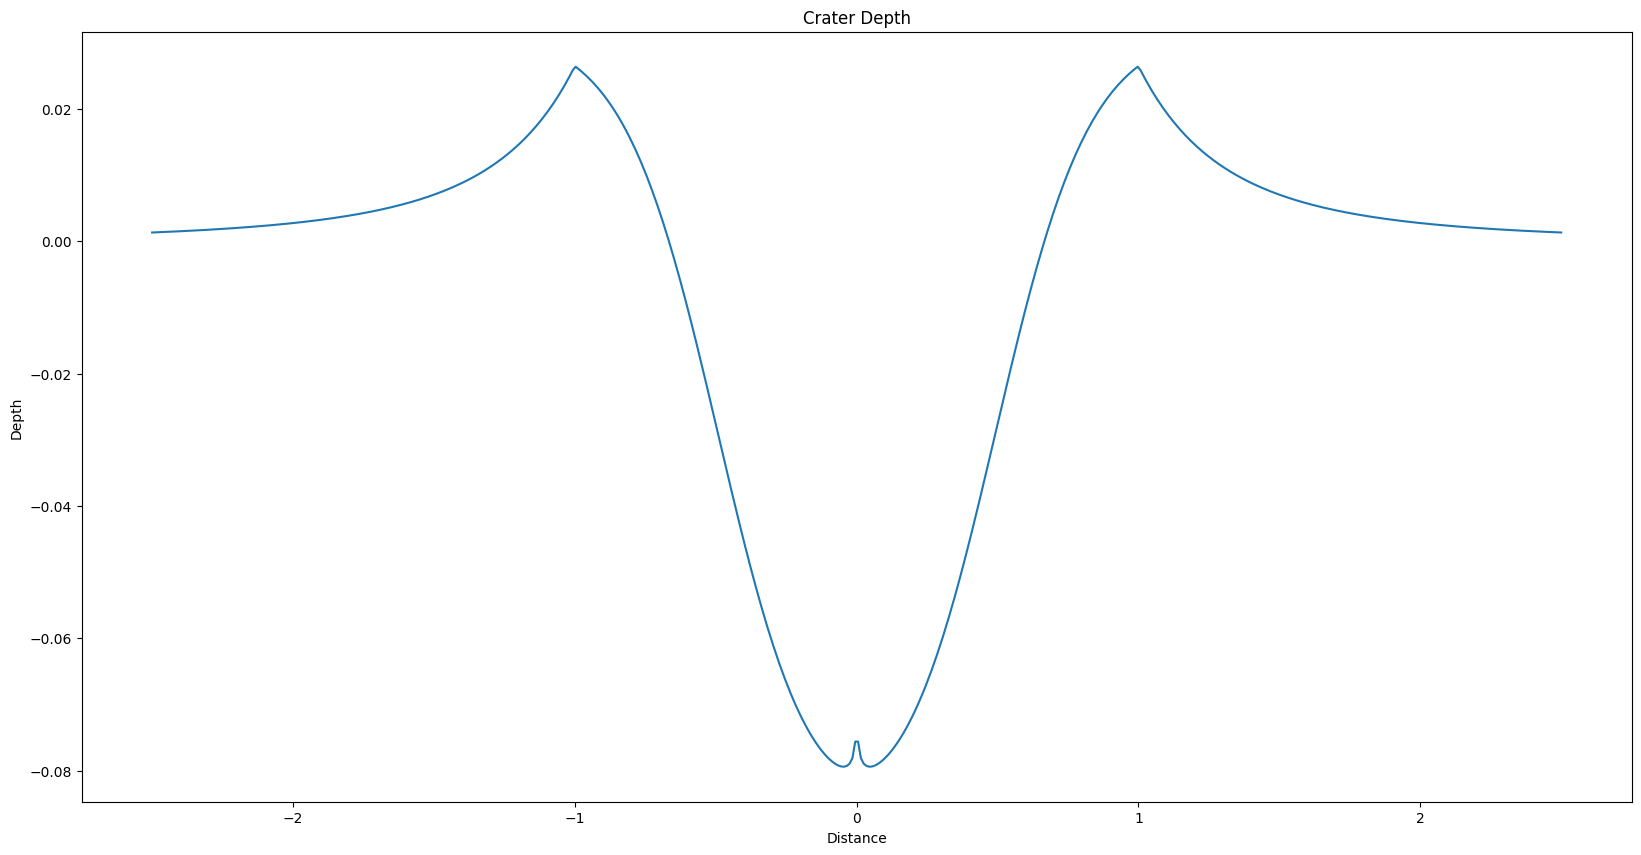

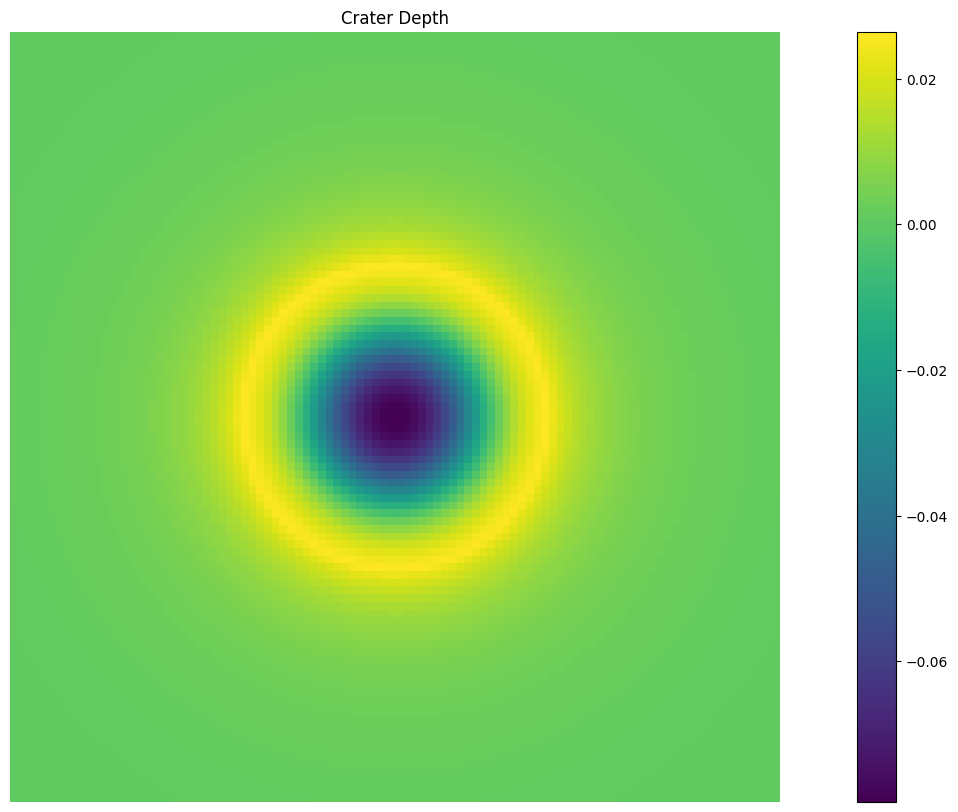

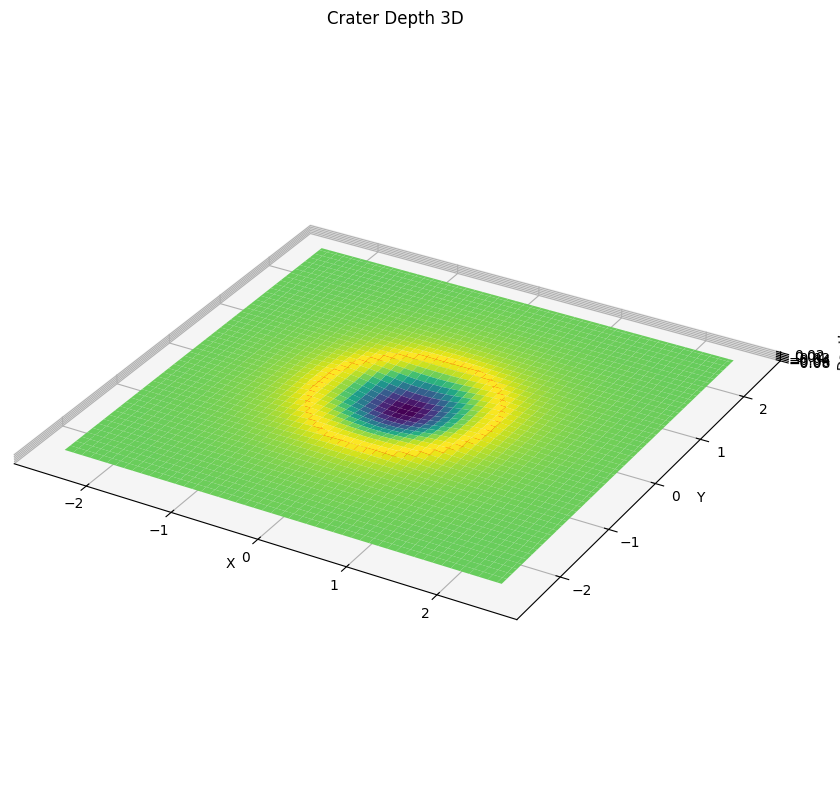

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

# class DemFeature(object):
#     def __init__(self, name, description, data):
#         self.name = name
#         self.description = description
#         self.data = data

#     def __str__(self):
#         return f"Feature: {self.name}\nDescription: {self.description}\nData: {self.data}"

#     # virtual method to add feature to existing DEM
#     @abstractmethod
#     def add_to_dem(self, dem):
#         pass

class Crater:
    def __init__(self, x, y, radius):
        self.x = x
        self.y = y
        self.radius = radius


x = np.linspace(-2.5, 2.5, 500)

def crater_depth(r, c1=0.02513, c2=-0.0757, a=-2.85, b = 5.8270, c4=0.114, c5=-0.002, alpha=-3.1906):
    D = r/2.0

    hr = c1*D**(c2)
    if r < 1.0:
        d0 = c4*D**(c5)
        C = d0*(np.exp(a)+1)/(np.exp(b)-1)
        h = C*(np.exp(b*r) - np.exp(b))/(1+np.exp(a + b*r))+hr
    else:
        h = hr*r**alpha
    return h

def get_crater_height(xv, params_vector):
    return np.array([crater_depth(np.abs(xi), *params_vector) for xi in xv])

height = np.zeros_like(x)
for i, xi in enumerate(x):
    height[i] = crater_depth(np.abs(xi))


nominal_params = [0.02513, -0.0757, -2.85,  5.8270, 0.114, -0.002, -3.1906]


fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x, height)
ax.set_title("Crater Depth")
ax.set_xlabel("Distance")
ax.set_ylabel("Depth")
# ax.set_aspect('equal')

# create a crater in a DEM

x = np.linspace(-2.5, 2.5, 100)
y = np.linspace(-2.5, 2.5, 100)
X, Y = np.meshgrid(x, y)

DEM = np.zeros_like(X)
for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        rij = np.sqrt(xi**2 + yj**2)
        DEM[i, j] = crater_depth(rij)

fig, ax = plt.subplots(figsize=(20, 10))
im = ax.imshow(DEM, cmap='viridis', origin='lower')
# smooth plotting
# ax.set_aspect('equal')
fig.colorbar(im, ax=ax, orientation='vertical')
ax.set_title("Crater Depth")

ax.axis('off')

import mpl_toolkits.mplot3d
# show crater in 3d
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, DEM, cmap='viridis')
# draw a circle at radius 1
theta = np.linspace(0, 2*np.pi, 100)
x_circle = np.cos(theta)
y_circle = np.sin(theta)
z_circle = np.zeros_like(x_circle)
ax.plot(x_circle, y_circle, z_circle, color='red', linewidth=4)
ax.set_title("Crater Depth 3D")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_box_aspect([u - l for l, u in (getattr(ax, f'get_{a}lim')() for a in 'xyz')])
ax.set_zlabel("Depth")



nominal_params [0.02513, -0.0757, -2.85, 5.827, 0.114, -0.002, -3.1906]
nominal_params [0.02513, -0.0757, -2.85, 5.827, 0.114, -0.002, -3.1906]
nominal_params [0.02513, -0.0757, -2.85, 5.827, 0.114, -0.002, -3.1906]
nominal_params [0.02513, -0.0757, -2.85, 5.827, 0.114, -0.002, -3.1906]
nominal_params [0.02513, -0.0757, -2.85, 5.827, 0.114, -0.002, -3.1906]
nominal_params [0.02513, -0.0757, -2.85, 5.827, 0.114, -0.002, -3.1906]
nominal_params [0.02513, -0.0757, -2.85, 5.827, 0.114, -0.002, -3.1906]
nominal_params [0.02513, -0.0757, -2.85, 5.827, 0.114, -0.002, -3.1906]
nominal_params [0.02513, -0.0757, -2.85, 5.827, 0.114, -0.002, -3.1906]
nominal_params [0.02513, -0.0757, -2.85, 5.827, 0.114, -0.002, -3.1906]
nominal_params [0.02513, -0.0757, -2.85, 5.827, 0.114, -0.002, -3.1906]
nominal_params [0.02513, -0.0757, -2.85, 5.827, 0.114, -0.002, -3.1906]
nominal_params [0.02513, -0.0757, -2.85, 5.827, 0.114, -0.002, -3.1906]
nominal_params [0.02513, -0.0757, -2.85, 5.827, 0.114, -0.002, -

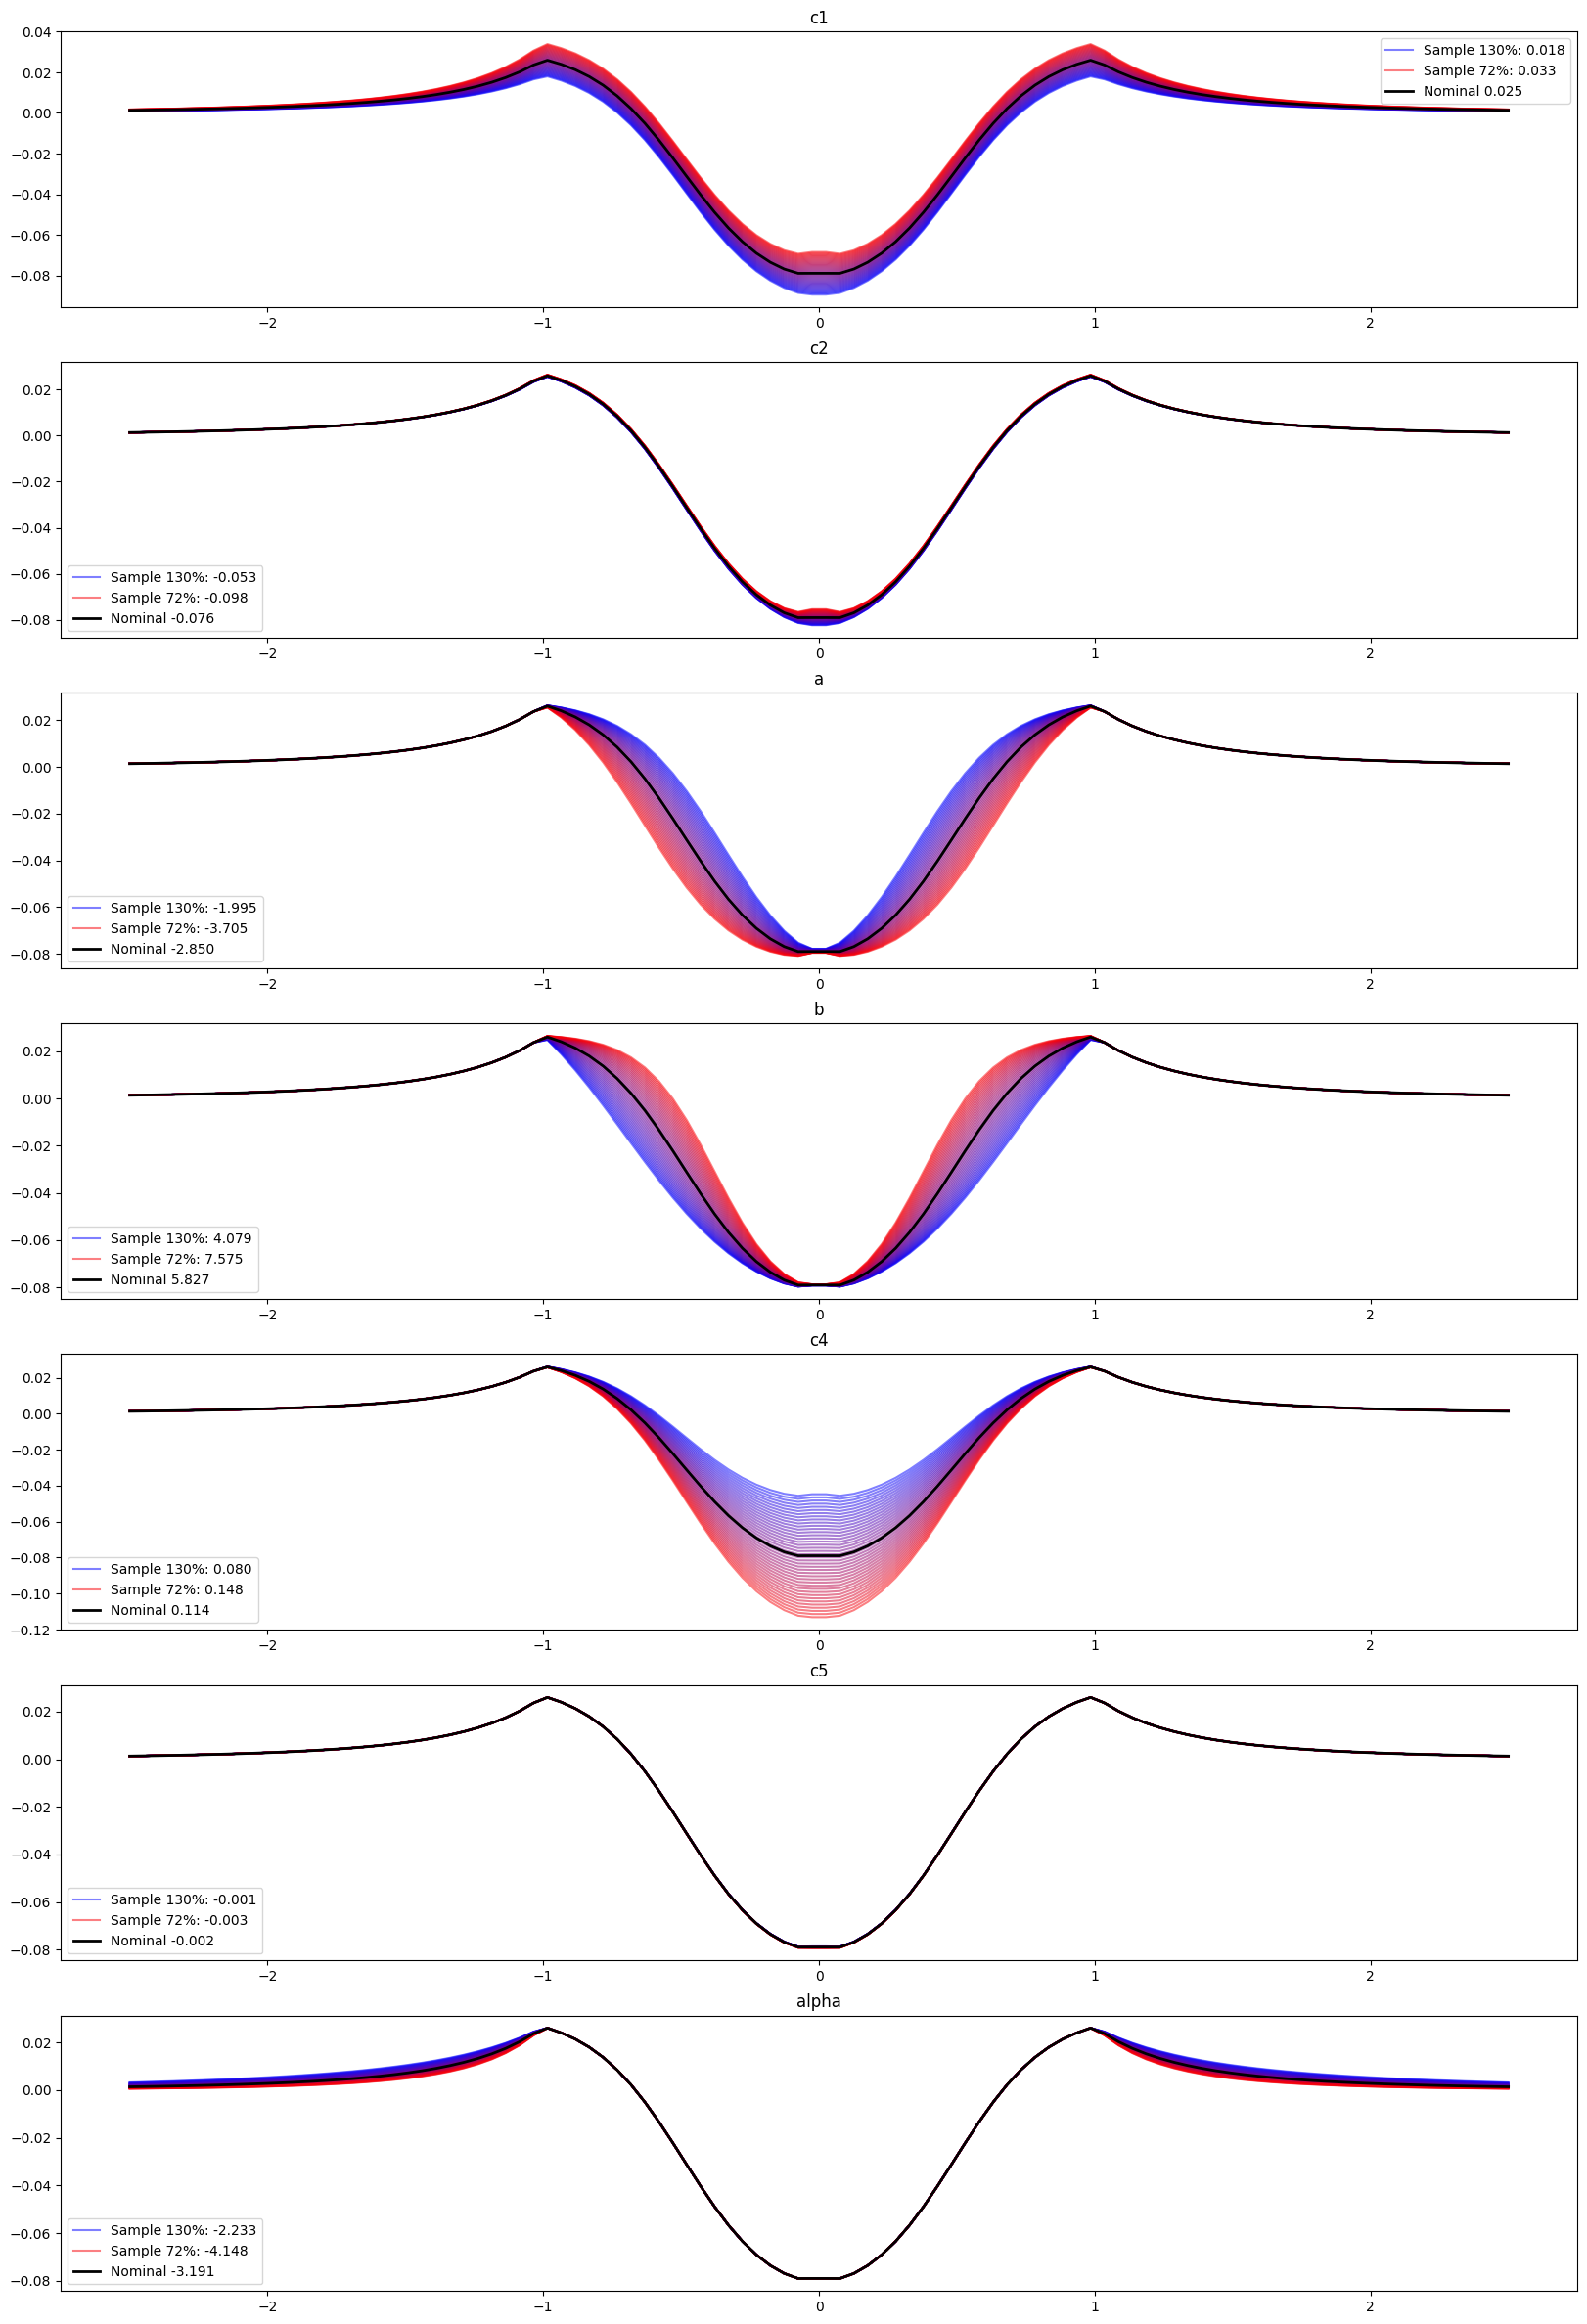

In [98]:
nominal_params = [0.02513, -0.0757, -2.85,  5.8270, 0.114, -0.002, -3.1906]
labels = ["c1", "c2", "a", "b", "c4", "c5", "alpha"]
variation = 0.3

import copy
# for each param, sample 20 times from a normal distribution with mean = param and std = 0.1*param, keep the rest constant. do a different plot for each sample

fig, ax = plt.subplots(figsize=(20, 30), nrows=len(nominal_params), ncols=1)
n_samples = 40
nominal_height = get_crater_height(x, nominal_params)
for param_index in range(len(nominal_params)):
    # ax[param_index].plot(x, get_crater_height(x, params), label=f"Nominal 3 {nominal_params[param_index]:.3f}", color='black', linewidth=2)
    param_samples = np.linspace(nominal_params[param_index]*(1-variation), nominal_params[param_index]*(1+variation), n_samples)
    params = [p for p in nominal_params]
    print(f"nominal_params {nominal_params}")
    for sample_index in range(n_samples):
        params[param_index] = param_samples[sample_index]
        # print(f"params {params}")
        # color goes from red to blue, from i = 0 to i = n_samples
        color_sample = (sample_index/n_samples*1.0, 0.0, (1 - sample_index/n_samples)*1.0, 0.5)
        # color_sample = (0.5, 0.5, 0.5, 0.5)
        height = get_crater_height(x, params)
        if sample_index==0 or sample_index==n_samples-1:
            ax[param_index].plot(x, height, color=color_sample, label=f"Sample {100*(1-variation*2*(sample_index/n_samples-0.5)):.0f}%: {param_samples[sample_index]:.3f}")
        else:
            ax[param_index].plot(x, height, color=color_sample)
    print(f"nominal_params {nominal_params}")
    # ax[param_index].plot(x, get_crater_height(x, params), label=f"Nominal 4 {nominal_params[param_index]:.3f}", color='black', linewidth=2)
    ax[param_index].plot(x, nominal_height, label=f"Nominal {nominal_params[param_index]:.3f}", color='black', linewidth=2)
    ax[param_index].set_title(f"{labels[param_index]}")
    ax[param_index].legend()

        


Text(0, 0.5, 'd0')

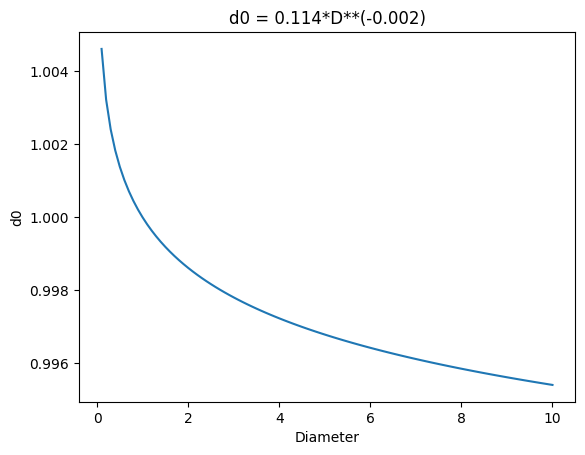

In [4]:
#  plot d0 = 0.114*D**(-0.002)
import numpy as np
import matplotlib.pyplot as plt
D = np.linspace(0.1, 10, 100)
d0 = D**(-0.002)

fig, ax = plt.subplots()
ax.plot(D, d0)
ax.set_title("d0 = 0.114*D**(-0.002)")
ax.set_xlabel("Diameter")
ax.set_ylabel("d0")

## Notes Craters

For 200m DEM crop

Adding craters to mesh: 1crater per s. 9541231 craters for 200m DEM: almost 4 months

Modifing the mesh, 70k faster, from 4 months to 2 min 16seconds

In [8]:
import humanize
print(humanize.precisedelta(9541231, minimum_unit='days'))
print(humanize.precisedelta(9541231/70000, minimum_unit='seconds'))

3 months and 18.93 days
2 minutes and 16 seconds


In [14]:
tiffs = "/home/dpastorm/Projects/lunamaps/moon_data/pgda/*_final_adj_5mpp_surf.tif"

import glob
import os
import humanize
from pathlib import Path

tiff_files = glob.glob(tiffs)
for tiff_file in tiff_files:
    file_size = os.path.getsize(tiff_file)
    # print(f"{tiff_file}: {humanize.naturalsize(file_size)}")

path = ["/home/dpastorm/Projects/lunamaps/moon_data/pgda/NPB/*"]
paths = []
for p in path:
    # paths.extend(glob.glob(p))
    paths.extend(Path(".").glob(p))

print(f"length of paths: {len(paths)}")


NotImplementedError: Non-relative patterns are unsupported

In [1]:
import lunasynth.terrain_enhancement as te

import numpy as np

rock_field = terrain_enhancement.RockField()
rock_field.generate_rock_field(
    args.CFA, args.size_x, args.size_y, args.h_min, args.h_max
)
rock_field.save(args.output)
if args.plot:
    rock_field.plot(show=True)
    rock_field.plot_cum_rock_size(show=True)

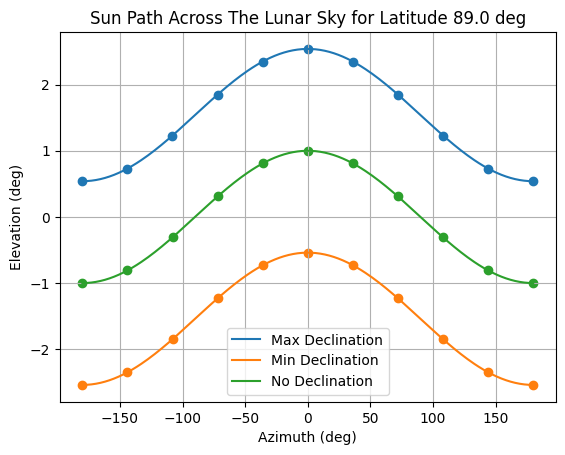

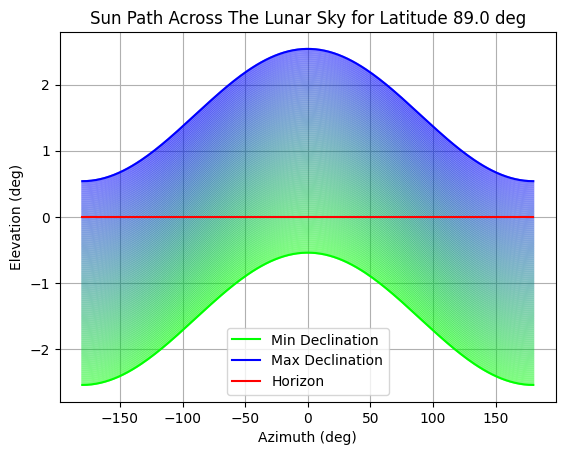

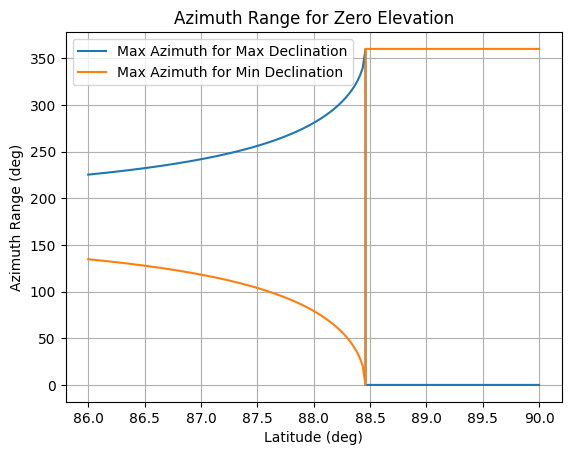

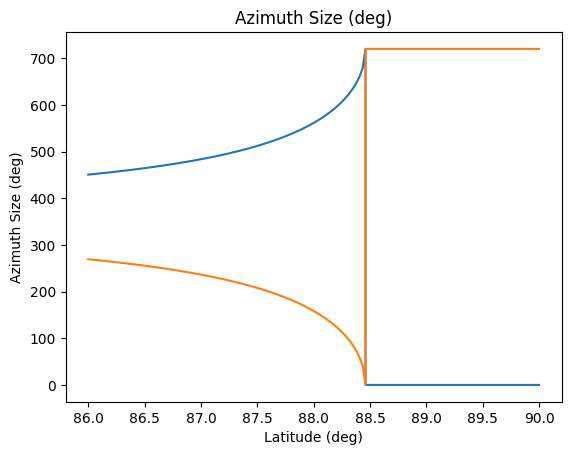

In [38]:
# test sun position
import numpy as np
import matplotlib.pyplot as plt


moon_radius = 1737.4
moon_declination = 1.54 * np.pi / 180
latitude = 89.0 * np.pi / 180

def sun_path(moon_declination, latitude):
    elevation = []
    azimuth = []
    # if abs(latitude) < np.pi/2 - abs(moon_declination):
    #     cos_zero_elevation =  np.arccos(-np.sin(latitude) * np.sin(moon_declination) / np.cos(latitude) / np.cos(moon_declination))
    #     sun_angle = np.linspace(-cos_zero_elevation, cos_zero_elevation, 200)
    # else:
    #     if abs(latitude + moon_declination) > np.pi/2:
    #         sun_angle = np.linspace(-np.pi, np.pi, 200)
    #     else:
    #         sun_angle = np.linspace(-np.pi, np.pi, 200)
    #         azimuth = np.linspace(-np.pi, np.pi, 200)
    #         elevation = np.zeros_like(azimuth)
    #         return elevation, azimuth
    sun_angle = np.linspace(-np.pi, np.pi, 200)
    for angle in sun_angle:
        Sx = np.cos(moon_declination) * np.sin(angle)
        Sy = np.cos(latitude) * np.sin(moon_declination) - np.sin(latitude) * np.cos(moon_declination) * np.cos(angle)
        Sz = np.sin(latitude) * np.sin(moon_declination) + np.cos(latitude) * np.cos(moon_declination) * np.cos(angle)
        e = np.arcsin(Sz)
        a = np.arctan2(-Sx, -Sy)
        elevation.append(e)
        azimuth.append(a)
    return np.array(elevation), np.array(azimuth)

# fig, ax = plt.subplots()
# ax.plot(sun_angle, elevation)
# ax.set_title("Sun Elevation")
# ax.set_xlabel("Angle")
# ax.set_ylabel("Elevation")

# fig, ax = plt.subplots()
# ax.plot(sun_angle, azimuth)
# ax.set_title("Sun Azimuth")
# ax.set_xlabel("Angle")
# ax.set_ylabel("Azimuth")

# fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# ax.plot(azimuth, elevation)
# ax.set_title("Sun Position")
# plt.show()
normalized_hour_vector = np.linspace(-1, 1, 11)
def normalized_sun_path(normalized_season, latitude, normalized_hour_vector):
    moon_declination = normalized_season * 1.54 * np.pi / 180
    normalized_elevation = []
    normalized_azimuth = []
    for hour in normalized_hour_vector:

        # if abs(latitude) < np.pi/2 - abs(moon_declination):
        #     cos_zero_elevation =  np.arccos(-np.sin(latitude) * np.sin(moon_declination) / np.cos(latitude) / np.cos(moon_declination))            
        # else:
        #     if abs(latitude + moon_declination) > np.pi/2:
        #         cos_zero_elevation = np.pi
        #     else:
        #         cos_zero_elevation = np.pi
        #         normalized_azimuth.append(np.pi * hour)
        #         normalized_elevation.append(0)
        #         continue
        
        cos_zero_elevation = np.pi
        sun_angle = cos_zero_elevation * hour

        Sx = np.cos(moon_declination) * np.sin(sun_angle)
        Sy = np.cos(latitude) * np.sin(moon_declination) - np.sin(latitude) * np.cos(moon_declination) * np.cos(sun_angle)
        Sz = np.sin(latitude) * np.sin(moon_declination) + np.cos(latitude) * np.cos(moon_declination) * np.cos(sun_angle)
        e = np.arcsin(Sz)
        a = np.arctan2(-Sx, -Sy)
        normalized_elevation.append(e)
        normalized_azimuth.append(a)
    return  np.array(normalized_azimuth), np.array(normalized_elevation)

fig, ax = plt.subplots()
elevation, azimuth = sun_path(moon_declination, latitude)
normalized_azimuth, normalized_elevation = normalized_sun_path(1, latitude, normalized_hour_vector)
ax.scatter(normalized_azimuth*180/np.pi, normalized_elevation*180/np.pi, marker="o")
ax.plot(azimuth*180/np.pi, elevation*180/np.pi, label="Max Declination")

moon_declination = -1.54 * np.pi / 180
elevation, azimuth = sun_path(moon_declination, latitude)
normalized_azimuth, normalized_elevation = normalized_sun_path(-1, latitude, normalized_hour_vector)
ax.plot(azimuth*180/np.pi, elevation*180/np.pi, label="Min Declination")
ax.scatter(normalized_azimuth*180/np.pi, normalized_elevation*180/np.pi, marker="o")

elevation, azimuth = sun_path(0, latitude)
ax.plot(azimuth*180/np.pi, elevation*180/np.pi, label="No Declination")
normalized_azimuth, normalized_elevation = normalized_sun_path(0, latitude, normalized_hour_vector)
ax.scatter(normalized_azimuth*180/np.pi, normalized_elevation*180/np.pi, marker="o")
ax.legend()

ax.set_title(f"Sun Path Across The Lunar Sky for Latitude {latitude*180/np.pi} deg")
ax.set_xlabel("Azimuth (deg)")
ax.set_ylabel("Elevation (deg)")
ax.grid()
plt.savefig("sun_path.png")
plt.show()

fig, ax = plt.subplots()
declination_vector = np.linspace(-1.54*np.pi/180, 1.54*np.pi/180, 100)
for moon_declination in declination_vector:
    elevation, azimuth = sun_path(moon_declination, latitude)
    moon_declination_01 = (moon_declination + max(declination_vector))/(2*max(declination_vector))
    ax.plot(azimuth*180/np.pi, elevation*180/np.pi, color=[0, 1- moon_declination_01, moon_declination_01], alpha=0.5)

moon_declination = -1.54*np.pi/180
elevation, azimuth = sun_path(moon_declination, latitude)
moon_declination_01 = (moon_declination + max(declination_vector))/(2*max(declination_vector))
ax.plot(azimuth*180/np.pi, elevation*180/np.pi, color=[0, 1- moon_declination_01, moon_declination_01], label="Min Declination")

moon_declination = 1.54*np.pi/180
elevation, azimuth = sun_path(moon_declination, latitude)
moon_declination_01 = (moon_declination + max(declination_vector))/(2*max(declination_vector))
ax.plot(azimuth*180/np.pi, elevation*180/np.pi, color=[0, 1- moon_declination_01, moon_declination_01], label="Max Declination")
ax.plot([-180,180], [0,0], label="Horizon", color="red")

ax.set_title(f"Sun Path Across The Lunar Sky for Latitude {latitude*180/np.pi:.1f} deg")
ax.set_xlabel("Azimuth (deg)")
ax.set_ylabel("Elevation (deg)")
ax.legend()
ax.grid()
plt.savefig("sun_path_declination.png")
plt.show()


def az_zero_elevation(moon_declination, latitude):
    angle =  np.arccos(-np.sin(latitude) * np.sin(moon_declination) / np.cos(latitude) / np.cos(moon_declination))
    Sx = np.cos(moon_declination) * np.sin(angle)
    Sy = np.cos(latitude) * np.sin(moon_declination) - np.sin(latitude) * np.cos(moon_declination) * np.cos(angle)
    az = np.arctan2(-Sx, -Sy)
    return abs(az)

az = []
max_latitude = (90 - 1.54) * np.pi/180
latitude_vector = np.linspace(86*np.pi/180, max_latitude, 100)
for latitude in latitude_vector:
    az.append([ az_zero_elevation(moon_declination, latitude)*2, az_zero_elevation(-moon_declination, latitude)*2])

extender_latitude_vector = np.linspace(max_latitude,np.pi/2, 100)
latitude_vector = np.concatenate((latitude_vector, extender_latitude_vector))
for latitude in extender_latitude_vector:
    az.append([ 0.0, 2*np.pi])
az = np.array(az)

fig, ax = plt.subplots()
ax.plot(latitude_vector*180/np.pi, az[:, 0]*180/np.pi, label="Max Azimuth for Max Declination")
ax.plot(latitude_vector*180/np.pi, az[:, 1]*180/np.pi, label="Max Azimuth for Min Declination")

ax.legend()
ax.set_title("Azimuth Range for Zero Elevation") 
ax.set_xlabel("Latitude (deg)")
ax.set_ylabel("Azimuth Range (deg)")
ax.grid()
plt.savefig("azimuth_zero_elevation.png")
plt.show()


# azimuh_size = np.array([abs(az[i, 1] - az[i, 0]) for i in range(len(az))])
fig, ax = plt.subplots()
ax.plot(latitude_vector*180/np.pi, 2*az[:,0]*180/np.pi, label="Azimuth Size for Max Declination")
ax.plot(latitude_vector*180/np.pi, 2*az[:,1]*180/np.pi, label="Azimuth Size for Min Declination")
ax.set_title("Azimuth Size (deg)")
ax.set_xlabel("Latitude (deg)")
ax.set_ylabel("Azimuth Size (deg)")
plt.show()


    

In [3]:
from pyproj import Proj, transform

# Define the polar stereographic projection for the Moon (using an example custom CRS)
# You may need to define a custom projection string for your specific needs
moon_polar_stereographic = Proj("+proj=stere +lat_0=90 +lon_0=0 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs")

# Define the lunar latitude and longitude projection (IAU 2000:49900)
lunar_wgs84 = Proj("+proj=longlat +a=1737400 +b=1737400 +no_defs")

# Sample polar stereographic coordinates (x, y)
x, y = 100000, 200000  # example values, replace with your coordinates

# Perform the transformation to latitude and longitude
lon, lat = transform(moon_polar_stereographic, lunar_wgs84, x, y)

print(f"Longitude: {lon}, Latitude: {lat}")

/tmp/ipykernel_23358/1042990991.py:14: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = transform(moon_polar_stereographic, lunar_wgs84, x, y)


ProjError: Error creating Transformer from CRS.: (Internal Proj Error: proj_create_operations: Source and target ellipsoid do not belong to the same celestial body (Earth vs Moon). You may override this check by setting the PROJ_IGNORE_CELESTIAL_BODY environment variable to YES.)

In [ ]:
    # bpy.context.scene.camera.location = mathutils.Vector((mesh_center.x, mesh_center.y, max_z + camera_margin)) 
    # mesh_center = sum((mathutils.Vector(b) for b in mesh_obj.bound_box), mathutils.Vector()) / 8
    # max_z = max(v.z for v in (mesh_obj.matrix_world @ mathutils.Vector(b) for b in mesh_obj.bound_box))
    # set camera orthographic scale
    # bpy.context.scene.camera.data.ortho_scale = max(
    #     mesh_obj.dimensions.x, mesh_obj.dimensions.y
    # )

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
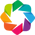

:Rectangles   [x,y,width,height]   (index)

In [2]:
import holoviews as hv
import pandas as pd
from holoviews import opts
hv.extension('bokeh')

# Example data
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [1, 2, 3, 4, 5],
    'width': [0.5, 0.5, 0.5, 0.5, 0.5],
    'height': [0.5, 0.5, 0.5, 0.5, 0.5],
    'index': [0, 1, 2, 3, 4]
})

# Create Rectangles element
rects = hv.Rectangles(data, kdims=['x', 'y', 'width', 'height'], vdims=['index'])

# Set options for the plot
hv_plot = rects.opts(
    opts.Rectangles(tools=['hover'], hover_line_color='blue', hover_fill_color='blue', line_color='blue')
)

# Display the plot
hv_plot


Unique sun_hours: [-1.0, -0.7, -0.4, -0.1, 0.2, 0.5, 0.8]
Unique sun_seasons: [-1.0, 1.0]


/tmp/ipykernel_74043/3577893191.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


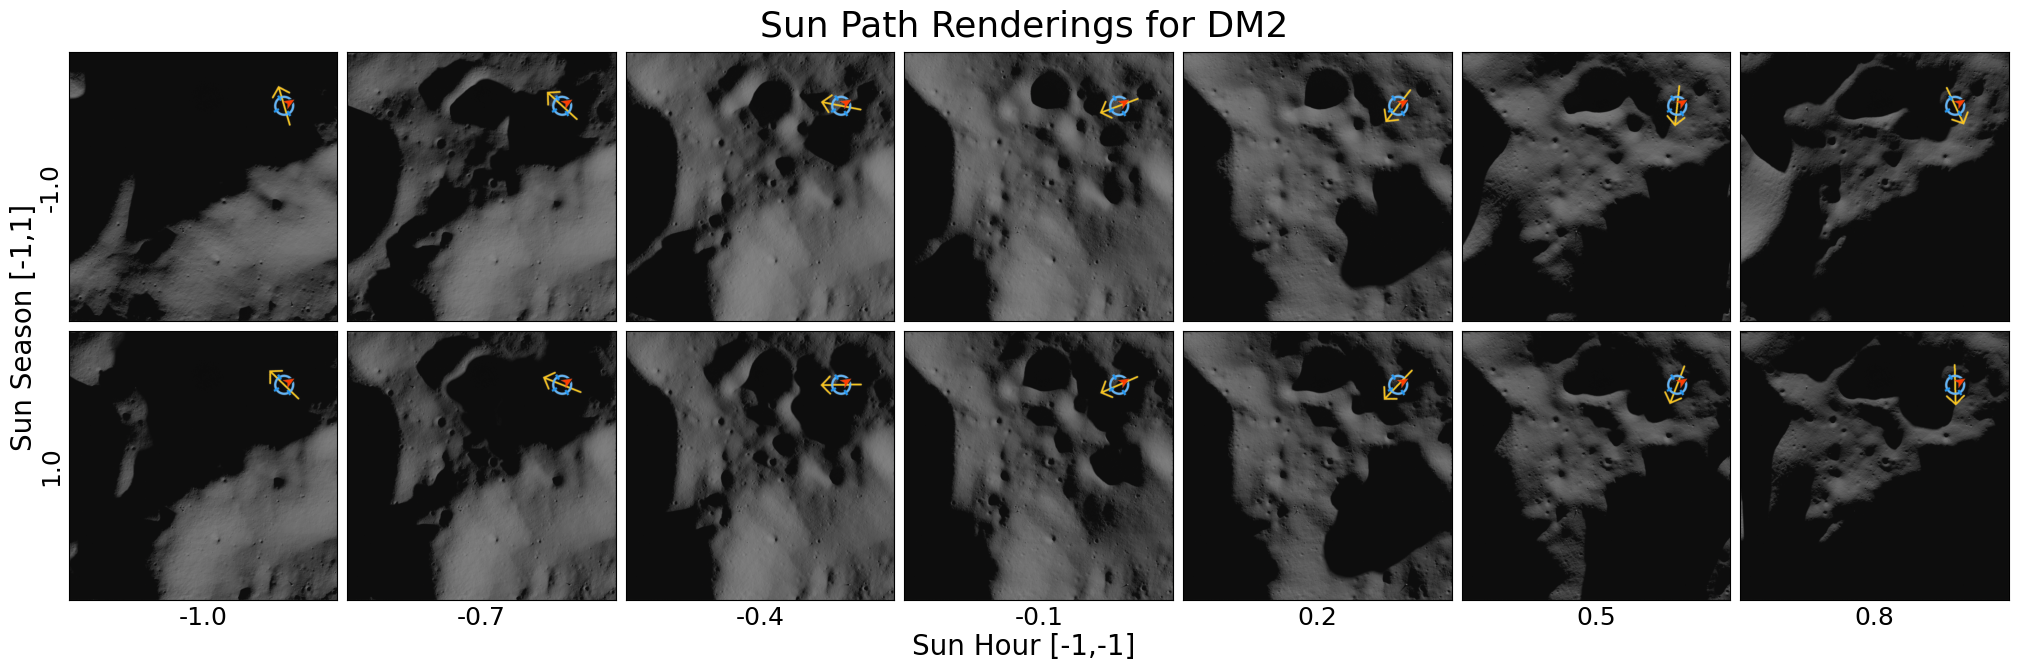

In [74]:
import os
import re
import pandas as pd

# Folder path and prefix
folder_path = "/home/dpastorm/Projects/lunamaps/moon_data/pgda"
prefix = 'DM2_final_adj_5mpp_surf_rendered'

# Regex pattern to extract sun_hour and sun_season as float numbers
pattern = re.escape(prefix)+r"_sun_hour_([+-]?\d+(\.\d+)?)_sun_season_([+-]?\d+(\.\d+)?).png$"

# List to store data
data = {}

# Loop through files in the folder
for filename in os.listdir(folder_path):
    if filename.startswith(prefix):
        match = re.match(pattern, filename)
        if match:
            sun_hour = float(match.group(1))
            sun_season = float(match.group(3))
            data[filename] = {'sun_hour': float(sun_hour), 'sun_season': float(sun_season)}

# get unique sun_hour and sun_season
unique_sun_hours = list(set([d['sun_hour'] for d in data.values()]))
unique_sun_hours.sort()
unique_sun_seasons = list(set([d['sun_season'] for d in data.values()]))
unique_sun_seasons.sort()


unique_sun_hours = unique_sun_hours[::3]
print(f"Unique sun_hours: {unique_sun_hours}")
print(f"Unique sun_seasons: {unique_sun_seasons}")

# skip every other unique sun_hour


# make a collage of the images, where columns are sun_hour and rows are sun_season
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from mpl_toolkits.axes_grid1 import ImageGrid

# Create a figure and axis
# fig, ax = plt.subplots(nrows=len(unique_sun_seasons), ncols=len(unique_sun_hours))
fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111, nrows_ncols=(len(unique_sun_seasons), len(unique_sun_hours)), axes_pad=0.1)

# Loop through the data and plot the images
k = 0
for ax in grid:
    # get the i and j index
    i = k // len(unique_sun_hours)
    j = k % len(unique_sun_hours)
    sun_hour = unique_sun_hours[j]
    sun_season = unique_sun_seasons[i]
    # find the filename
    filename = None
    for key, values in data.items():
        if values['sun_hour'] == sun_hour and values['sun_season'] == sun_season:
            filename = key
            break
    if filename is not None:
        img = mpimg.imread(os.path.join(folder_path, filename))
        ax.imshow(img)
        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            ax.set_ylabel(f"{sun_season}", fontsize=18)
        if i == len(unique_sun_seasons) - 1:
            ax.set_xlabel(f"{sun_hour}", fontsize=18) 
    k += 1


# fig.suptitle("Sun Path Renderings")
fig.text(0.5, 0.65, "Sun Path Renderings for DM2", ha='center', va='center', fontsize=26)
fig.text(0.5, 0.34, "Sun Hour [-1,-1]", ha='center', va='center', fontsize=20)
fig.text(0.0, 0.5, "Sun Season [-1,1]", ha='center', va='center', rotation='vertical', fontsize=20)

plt.tight_layout()
plt.savefig("collage.png", dpi=300)
plt.show()

Unique sun_hours: [-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
Unique sun_seasons: ['DM2', 'Haworth', 'LM1', 'LM2', 'LM3', 'LM4', 'LM5', 'LM6', 'LM7', 'LM8', 'NPA', 'NPB', 'NPC', 'NPD', 'SL2', 'SL3', 'Shoemaker', 'Site01', 'Site04', 'Site06', 'Site07', 'Site11', 'Site20', 'Site20v2', 'Site23', 'Site42']


/tmp/ipykernel_577270/2276838790.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


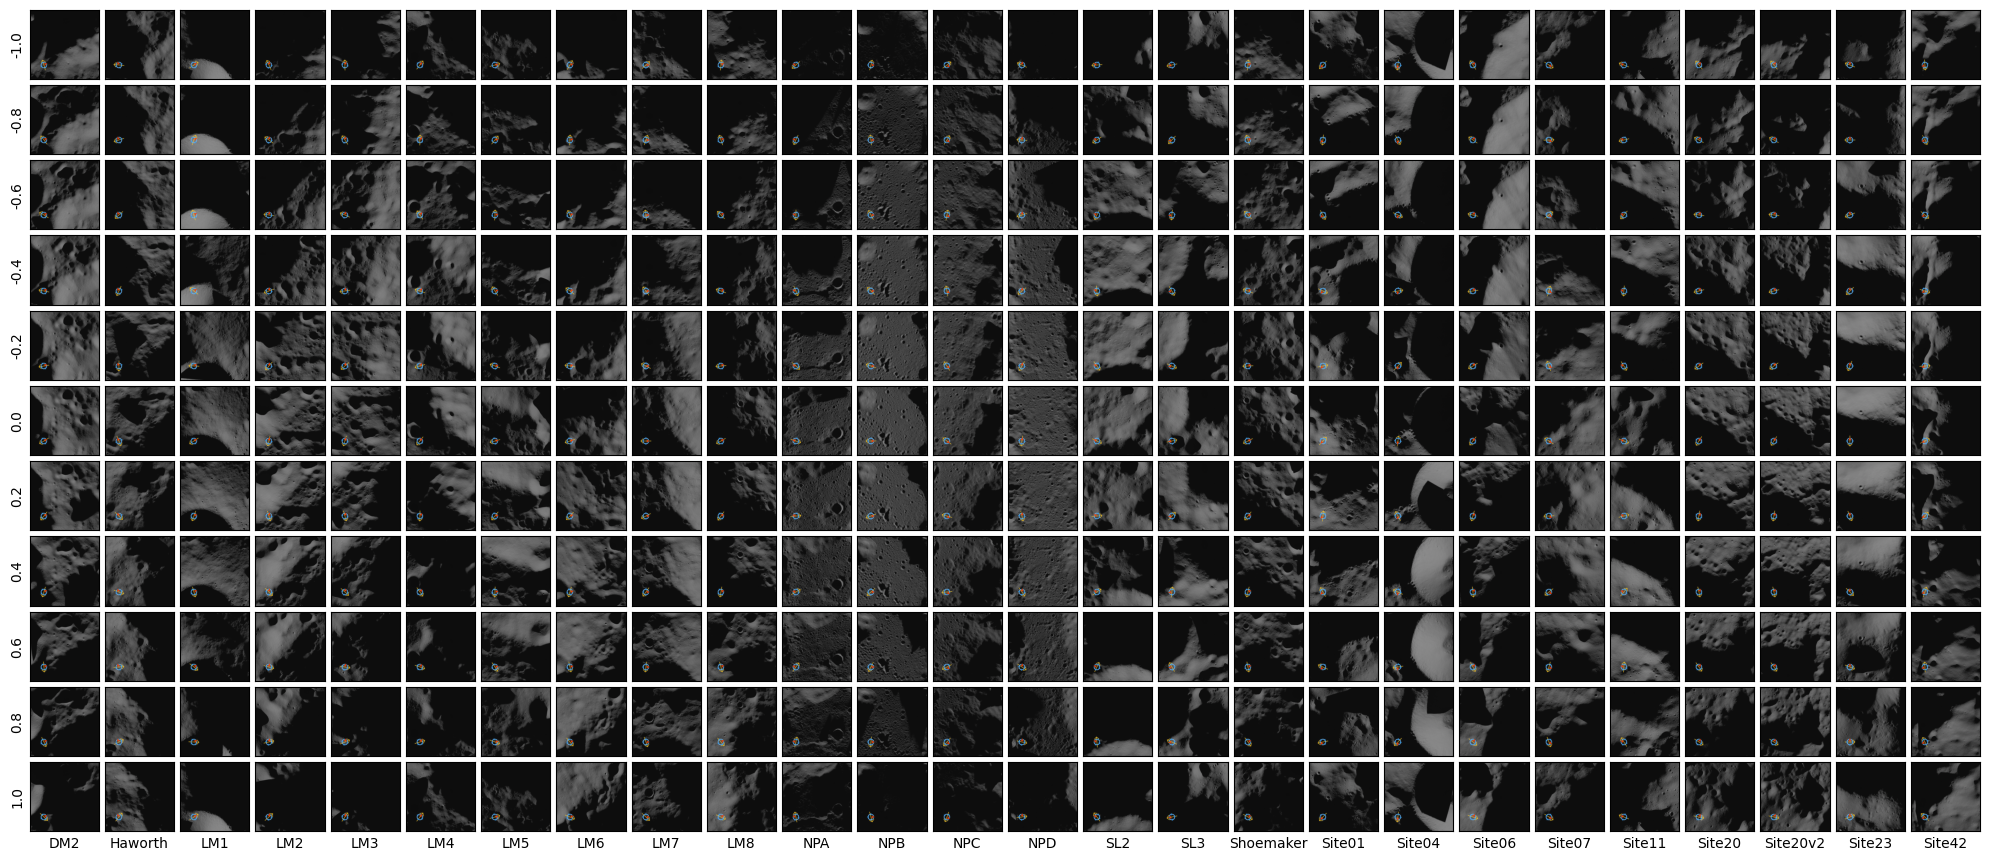

In [30]:
import os
import re
import pandas as pd

# Folder path and prefix
folder_path = "/home/dpastorm/Projects/lunamaps/moon_data/pgda"

# Regex pattern to extract sun_hour and sun_season as float numbers
pattern = r"^([a-zA-Z0-9]+)_final_adj_5mpp_surf_rendered_sun_hour_([+-]?\d+(\.\d+)?)_sun_season_([+-]?\d+(\.\d+)?).png$"

# List to store data
data = {}

# Loop through files in the folder
for filename in os.listdir(folder_path):
    match = re.match(pattern, filename)
    if match:
        data[filename] = {'sun_hour': float(match.group(2)), 
                          'site': str(match.group(1)),
                          'sun_season': float(match.group(4))}

# get unique sun_hour and sun_season
unique_sun_hours = list(set([d['sun_hour'] for d in data.values()]))
unique_sun_hours.sort()
unique_sites = list(set([d['site'] for d in data.values()]))
unique_sites.sort()


# unique_sun_hours = unique_sun_hours[::3]
print(f"Unique sun_hours: {unique_sun_hours}")
print(f"Unique sun_seasons: {unique_sites}")

# skip every other unique sun_hour


# make a collage of the images, where columns are sun_hour and rows are sun_season
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from mpl_toolkits.axes_grid1 import ImageGrid

# Create a figure and axis
def plot_grid(data_dict, x_key, y_key, folder_path):
    x_unique = list(set([d[x_key] for d in data_dict.values()]))
    x_unique.sort()
    y_unique = list(set([d[y_key] for d in data_dict.values()]))
    y_unique.sort()
    fig = plt.figure(figsize=(20, 20))
    grid = ImageGrid(fig, 111, nrows_ncols=(len(y_unique), len(x_unique)), axes_pad=0.06)

    # Loop through the data and plot the images
    k = 0
    for ax in grid:
        # get the i and j index
        i = k // len(x_unique)
        j = k % len(x_unique)
        x_value = x_unique[j]
        y_value = y_unique[i]
        # find the filename
        filename = None
        for key, values in data.items():
            # print(f"Checking {values[x_key]} == {x_value} and {values[y_key]} == {y_value}")
            if values[x_key] == x_value and values[y_key] == y_value:
                filename = key
                break
        if filename is not None:
            img = mpimg.imread(os.path.join(folder_path, filename))
            ax.imshow(img)
            ax.set_xticks([])
            ax.set_yticks([])
            if j == 0:
                ax.set_ylabel(f"{y_value}", fontsize=10)
            if i == len(y_unique) - 1:
                ax.set_xlabel(f"{x_value}", fontsize=10) 
        k += 1

    # fig.text(0.5, 0.65, "Sun Path Renderings", ha='center', va='center', fontsize=26)
    # fig.text(0.5, 0.34, "Sun Hour [-1,-1]", ha='center', va='center', fontsize=20)
    # fig.text(0.0, 0.5, "Site", ha='center', va='center', rotation='vertical', fontsize=20)

    plt.tight_layout()
    plt.savefig("site_sun_hour.png", dpi=300)
    plt.show()

plot_grid(data, 'site', 'sun_hour', folder_path)

Unique sun_hours: [-0.9, 0.2, 0.9]
Unique sun_seasons: [-1.0, 1.0]


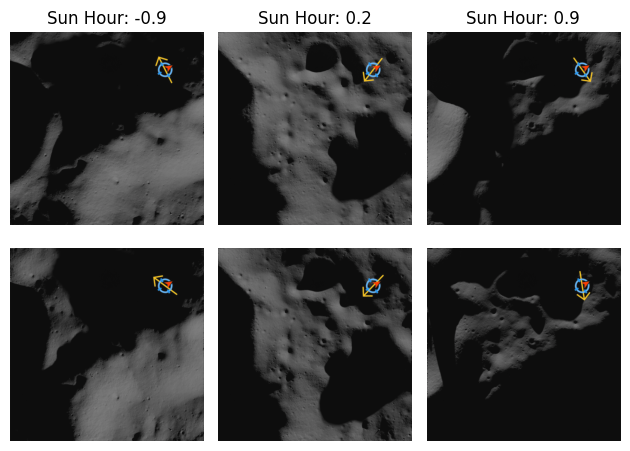

In [ ]:
\
import os
import re
import pandas as pd

# Folder path and prefix
folder_path = "/home/dpastorm/Projects/lunamaps/moon_data/pgda"
prefix = 'DM2_final_adj_5mpp_surf_rendered'

# Regex pattern to extract sun_hour and sun_season as float numbers
pattern = re.escape(prefix)+r"_sun_hour_([+-]?\d+(\.\d+)?)_sun_season_([+-]?\d+(\.\d+)?).png$"

# List to store data
data = {}

# Loop through files in the folder
for filename in os.listdir(folder_path):
    if filename.startswith(prefix):
        match = re.match(pattern, filename)
        if match:
            sun_hour = float(match.group(1))
            sun_season = float(match.group(3))
            data[filename] = {'sun_hour': float(sun_hour), 'sun_season': float(sun_season)}

# get unique sun_hour and sun_season
unique_sun_hours = list(set([d['sun_hour'] for d in data.values()]))
unique_sun_hours.sort()
unique_sun_seasons = list(set([d['sun_season'] for d in data.values()]))
unique_sun_seasons.sort()


print(f"Unique sun_hours: {unique_sun_hours}")
print(f"Unique sun_seasons: {unique_sun_seasons}")


# make a collage of the images, where columns are sun_hour and rows are sun_season
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots(nrows=len(unique_sun_seasons), ncols=len(unique_sun_hours))

# Loop through the data and plot the images
for filename, values in data.items():
    sun_hour = values['sun_hour']
    sun_season = values['sun_season']
    img = mpimg.imread(os.path.join(folder_path, filename))
    row = unique_sun_seasons.index(sun_season)
    col = unique_sun_hours.index(sun_hour)
    ax[row, col].imshow(img)
    ax[row, col].axis('off')

# write sun_hour on top of the columns
for i, sun_hour in enumerate(unique_sun_hours):
    ax[0, i].set_title(f"Sun Hour: {sun_hour}")

# write sun_season on the left of the rows
for i, sun_season in enumerate(unique_sun_seasons):
    ax[i, 0].set_ylabel(f"Sun Season: {sun_season}")


plt.tight_layout()
plt.show()

In [15]:
import rasterio
from rasterio.warp import transform

# Path to your GeoTIFF file
file_path = '/home/dpastorm/Projects/lunamaps/moon_data/pgda/Site42_final_adj_5mpp_surf.tif'

def decimal_to_dms(deg_raw):
    # Get the integer part of the degrees
    deg = abs(deg_raw)
    d = int(deg)
    
    # Get the fractional part and convert to minutes
    min_float = (deg - d) * 60
    m = int(min_float)
    
    # Get the fractional part of minutes and convert to seconds
    s = (min_float - m) * 60
    n_s = "S" if deg_raw < 0 else "N"
    return f"{d}°{m}'{s:.2f}\"{n_s}"

# Open the GeoTIFF file
with rasterio.open(file_path) as dataset:
    # Read the metadata of the GeoTIFF file
    bounds = dataset.bounds
    original_stereographic_crs = dataset.transform
    
    # Get the coordinates of the corners
    top_left = (bounds.left, bounds.top)
    top_right = (bounds.right, bounds.top)
    bottom_left = (bounds.left, bounds.bottom)
    bottom_right = (bounds.right, bounds.bottom)
    
    # Print the coordinates
    print(f'Top Left: {top_left}')
    print(f'Top Right: {top_right}')
    print(f'Bottom Left: {bottom_left}')
    print(f'Bottom Right: {bottom_right}')
    
    lunar_south_crs = "ESRI:103878" # Moon 2000 South Pole Stereographic
    lunar_center_crs = "ESRI:104903" # GCS_Moon_2000

    # Optionally, get the latitude and longitude of the center of the image
    center_x = (bounds.left + bounds.right) / 2
    center_y = (bounds.top + bounds.bottom) / 2
    lat, long = transform(lunar_south_crs, lunar_center_crs, [center_y], [center_x])
    print(f'Center Latitude and Longitude: {decimal_to_dms(lat[0])}, {decimal_to_dms(long[0])}')

    # geom = rasterio.warp.transform_geom(
        # dataset.crs, 'EPSG:4326', (center_x, center_y), precision=6
    # )

Top Left: (-123400.0, -46100.0)
Top Right: (-103400.0, -46100.0)
Bottom Left: (-123400.0, -66100.0)
Bottom Right: (-103400.0, -66100.0)
Center Latitude and Longitude: 153°40'40.74"S, 85°49'46.38"S


/tmp/ipykernel_1871000/1272678751.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread("/home/dpastorm/default_blender.png")


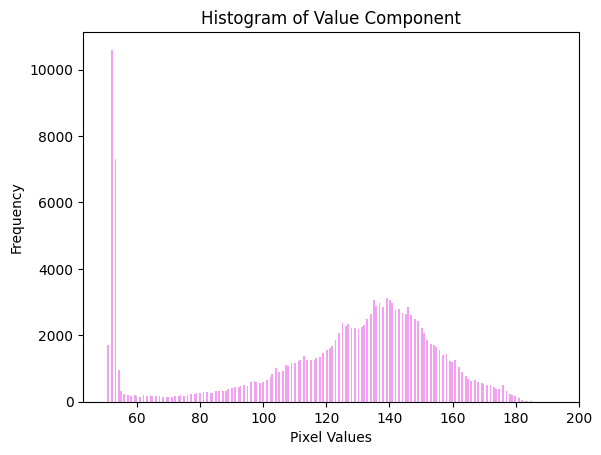

In [6]:

import imageio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import rgb_to_hsv

image = imageio.imread("/home/dpastorm/default_blender.png")
# Load the image

# Check if the image is grayscale or color
if len(image.shape) == 2:
    # Image is grayscale
    pixels = image.flatten()
    plt.hist(pixels, bins=256, color='gray', alpha=0.75)
    plt.title('Histogram of Gray Pixel Values')
elif len(image.shape) == 3 and image.shape[2] in [3, 4]:
    # Image is color
    # Normalize the RGB values to [0, 1] as required by rgb_to_hsv. discard alpha channel if present
    image_normalized = image[:, :, :3] / 255.0
    # Convert RGB to HSV
    hsv_image = rgb_to_hsv(image_normalized)
    # Extract the Value channel
    value_data = hsv_image[:, :, 2].flatten() * 255  # Scale back to [0, 255] for histogram
    plt.hist(value_data, bins=256, color='violet', alpha=0.75)
    plt.title('Histogram of Value Component')

# Set labels
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')

# Display the histogram
plt.show()



In [4]:
from lunasynth.config_loader import ConfigLoader
import json

# print(ConfigLoader('/home/dpastorm/Projects/lunamaps/lunasynth/test/config_loader/no_include.yaml').data)
# print(ConfigLoader('/home/dpastorm/Projects/lunamaps/lunasynth/test/config_loader/no_include.yaml', args_updates={'no_include_data': 'heeelo'}).data)
# print(ConfigLoader('/home/dpastorm/Projects/lunamaps/lunasynth/test/config_loader/no_include.yaml', args_updates=['no_include_data=heeelo']).data)
# print(ConfigLoader('/home/dpastorm/Projects/lunamaps/lunasynth/test/config_loader/no_include.yaml', args_updates=['include_child_data.property1=10.0']).data)
# print(ConfigLoader('/home/dpastorm/Projects/lunamaps/lunasynth/test/config_loader/no_include.yaml', args_updates=['include_child_data.property1=hellooo']).data)
# print(ConfigLoader('/home/dpastorm/Projects/lunamaps/lunasynth/test/config_loader/no_include.yaml', args_updates=['include_child_data.property1="hello"']).data)
# print(ConfigLoader('/home/dpastorm/Projects/lunamaps/lunasynth/test/config_loader/no_include.yaml', args_updates=['include_child_data.property1=True']).data)
# print(ConfigLoader('/home/dpastorm/Projects/lunamaps/lunasynth/test/config_loader/no_include.yaml', args_updates=['include_child_data.tree.property2=4']).data)
# print(ConfigLoader('/home/dpastorm/Projects/lunamaps/lunasynth/test/config_loader/no_include.yaml', args_updates=['include_child_data.tree.property3=4']).data)

# print(ConfigLoader('/home/dpastorm/Projects/lunamaps/lunasynth/test/config_loader/no_include.yaml').data)
# print("original", json.dumps(ConfigLoader('/home/dpastorm/Projects/lunamaps/lunasynth/test/config_loader/include_child.yaml').config, indent=4, sort_keys=True))

# config = ConfigLoader('/home/dpastorm/Projects/lunamaps/lunasynth/test/config_loader/include_child.yaml').config
# config = ConfigLoader('/home/dpastorm/Projects/lunamaps/lunasynth/test/config_loader/include_child.yaml', args_updates=['property3=10']).config
config = ConfigLoader('/home/dpastorm/Projects/lunamaps/lunasynth/test/config_loader/include_child.yaml', args_updates=['tree.property1=!include no_include.yaml']).config
config = ConfigLoader('/home/dpastorm/Projects/lunamaps/lunasynth/test/config_loader/include_child.yaml', args_updates=['tree.property1={value1: 2, value2: 3}']).config

print("include replace", json.dumps(config, indent=4, sort_keys=True))


include replace {
    "property1": "value1",
    "property2": 3,
    "property3": {
        "include_child_data": {
            "property1": "value1",
            "property2": 3,
            "tree": {
                "property1": "value1",
                "property2": 3
            }
        },
        "no_include_data": "Hello"
    },
    "tree": {
        "property1": {
            "value1": 2,
            "value2": 3
        },
        "property2": 3
    }
}
